#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Winning player check

In [4]:
def has_player_won(board_state):
    """
    Check if any player has won the game by having orbs of only one color on the board.

    Parameters:
    - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.

    Returns:
    - bool: True if any player has won, False otherwise.
    """
    rows = len(board_state)
    cols = len(board_state[0])
    unique_colors = set()

    for i in range(rows):
        for j in range(cols):
            cell_state = board_state[i][j]
            if cell_state != '--':
                unique_colors.add(cell_state[0])

    return len(unique_colors) == 1

In [35]:
current_board_state = [
    ['11', '--', '--'],
    ['--', '11', '--'],
    ['--', '01', '01']
]

In [8]:
if has_player_won(current_board_state):
    print("Some player has won the game!")
else:
    print("The game is still ongoing.")

The game is still ongoing.


In [23]:
bb = [['11','12','--','--','--','--'],
      ['12','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','--'],
      ['--','--','--','--','--','02'],
      ['--','--','--','--','02','01']]

In [22]:
bb[0][1][1]

'2'

#### Available actions

In [46]:
def get_available_actions(board_state, player_id):
    """
    Get the list of available actions in a Chain Reaction game.

    Parameters:
    - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.
    - player_id (str): The player identifier making the move.

    Returns:
    - list of tuples: List of available actions, where each action is represented as a tuple (row, column).
    """
    rows = len(board_state)
    cols = len(board_state[0])
    available_actions = []

    for r in range(rows):
        for c in range(cols):
            cell_state = board_state[r][c]
            # Check if the cell is empty or has orbs of the player's color
            if cell_state == '--' or cell_state[0] == str(player_id):
                available_actions.append((r,c))
                
    return available_actions

In [33]:
# player_id = '1'  # Assume player 1's identifier is '1'

In [47]:
actions = get_available_actions(current_board_state, 0)
print("Available Actions player 0:", actions)
print('----------------------------------------')
actions = get_available_actions(current_board_state, 1)
print("Available Actions player 1:", actions)

Available Actions player 0: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
----------------------------------------
Available Actions player 1: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0)]


#### Board update

In [183]:
# def update_board(board_state, action, player_id):
#     """
#     Update the Chain Reaction board based on a given action, including handling chain reactions.

#     Parameters:
#     - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.
#     - action (tuple): The action to be performed, represented as a tuple (row, column).
#     - player_id (str): The player identifier making the move.

#     Returns:
#     - list of lists: Updated board state after the action and chain reactions.
#     """
#     def get_critical_mass(row, col):
#         """
#         Get the critical mass for a given cell.

#         Parameters:
#         - row (int): Row index of the cell.
#         - col (int): Column index of the cell.

#         Returns:
#         - int: Critical mass for the cell.
#         """
#         if row == 0 or row == rows - 1:
#             if col == 0 or col == cols - 1:
#                 return 2  # Corner cell
#             return 3  # Edge cell
#         if col == 0 or col == cols - 1:
#             return 3  # Edge cell
#         return 4  # Interior cell

#     rows = len(board_state)
#     cols = len(board_state[0])
#     updated_board = [row.copy() for row in board_state]
#     row, col = action

#     # Check if the cell is empty or has orbs of the player's color
#     if updated_board[row][col] == '--' or updated_board[row][col][0] == str(player_id):
#         # Add an orb to the cell
#         if updated_board[row][col] == '--':
#             updated_board[row][col] = str(player_id) + '1'
#         else:
#             # If the cell already has orbs of the player's color, increment the number of orbs
#             num_orbs = int(updated_board[row][col][1])
#             updated_board[row][col] = str(player_id) + str(num_orbs + 1)

#         # Check for critical mass and trigger chain reaction if reached
#         critical_mass = get_critical_mass(row, col)
#         if int(updated_board[row][col][1]) >= critical_mass:
#             updated_board = handle_chain_reaction(updated_board, row, col, player_id)

#     return updated_board

# def handle_chain_reaction(board_state, row, col, player_id):
#     """
#     Handle chain reaction for a given cell.

#     Parameters:
#     - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.
#     - row (int): Row index of the cell.
#     - col (int): Column index of the cell.
#     - player_id (str): The player identifier making the move.

#     Returns:
#     - list of lists: Updated board state after the chain reaction.
#     """
    
#     def get_critical_mass(row, col):
#         """
#         Get the critical mass for a given cell.

#         Parameters:
#         - row (int): Row index of the cell.
#         - col (int): Column index of the cell.

#         Returns:
#         - int: Critical mass for the cell.
#         """
#         if row == 0 or row == rows - 1:
#             if col == 0 or col == cols - 1:
#                 return 2  # Corner cell
#             return 3  # Edge cell
#         if col == 0 or col == cols - 1:
#             return 3  # Edge cell
#         return 4  # Interior cell
    
#     rows = len(board_state)
#     cols = len(board_state[0])
#     updated_board = [row.copy() for row in board_state]

#     # Mark the current cell as empty
#     updated_board[row][col] = '--'

#     # Get critical mass for the current cell
#     critical_mass = get_critical_mass(row, col)

#     # Split and add one orb to every orthogonally adjacent cell
#     for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         new_row, new_col = row + dr, col + dc
#         if 0 <= new_row < rows and 0 <= new_col < cols:
#             if updated_board[new_row][new_col] == '--':
#                 updated_board[new_row][new_col] = str(player_id) + '1'
#             else:
#                 num_orbs = int(updated_board[new_row][new_col][1])
#                 updated_board[new_row][new_col] = str(player_id) + str(num_orbs + 1)

#     # Recursively trigger chain reactions for adjacent cells
#     for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         new_row, new_col = row + dr, col + dc
#         if 0 <= new_row < rows and 0 <= new_col < cols and updated_board[new_row][new_col][0] == str(player_id):
#             if int(updated_board[new_row][new_col][1]) >= critical_mass:
#                 updated_board = handle_chain_reaction(updated_board, new_row, new_col, player_id)

#     return updated_board

In [55]:
def update_board(board_state, action, player_id):
   
    def get_critical_mass(row, col):
      
        if row == 0 or row == rows - 1:
            if col == 0 or col == cols - 1:
                return 2  # Corner cell
            return 3  # Edge cell
        if col == 0 or col == cols - 1:
            return 3  # Edge cell
        return 4  # Interior cell

    rows = len(board_state)
    cols = len(board_state[0])
    updated_board = [row.copy() for row in board_state]
    row, col = action

    # Check if the cell is empty or has orbs of the player's color
    if updated_board[row][col] == '--' or updated_board[row][col][0] == str(player_id):
        
        # Add an orb to the cell
        if updated_board[row][col] == '--':
            updated_board[row][col] = str(player_id) + '1'
        else:
            # If the cell already has orbs of the player's color, increment the number of orbs
            num_orbs = int(updated_board[row][col][1])
            updated_board[row][col] = str(player_id) + str(num_orbs + 1)
            
            # Check for critical mass and trigger chain reaction if reached
            critical_mass = get_critical_mass(row, col)
            
            if int(updated_board[row][col][1]) >= critical_mass:
                updated_board = handle_chain_reaction(updated_board, row, col, player_id)

    return updated_board

In [56]:
# def handle_chain_reaction(board_state, row, col, player_id):
   
#     def get_critical_mass(row, col):
        
#         if row == 0 or row == rows - 1:
#             if col == 0 or col == cols - 1:
#                 return 2  # Corner cell
#             return 3  # Edge cell
#         if col == 0 or col == cols - 1:
#             return 3  # Edge cell
#         return 4  # Interior cell
    
#     rows = len(board_state)
#     cols = len(board_state[0])
#     updated_board = [row.copy() for row in board_state]
    
#     # Split and add one orb to every orthogonally adjacent cell
#     for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         new_row, new_col = row + dr, col + dc
#         if 0 <= new_row < rows and 0 <= new_col < cols:
#             if updated_board[new_row][new_col] == '--':
#                 updated_board[new_row][new_col] = str(player_id) + '1'
#             else:
#                 num_orbs = int(updated_board[new_row][new_col][1])
#                 updated_board[new_row][new_col] = str(player_id) + str(num_orbs + 1)

#     # Mark the current cell as empty
#     updated_board[row][col] = '--'
    

#     # Get critical mass for the current cell
#     critical_mass = get_critical_mass(row, col)

#     # Recursively trigger chain reactions for adjacent cells
#     for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         new_row, new_col = row + dr, col + dc
#         if 0 <= new_row < rows and 0 <= new_col < cols and updated_board[new_row][new_col][0] == str(player_id):
#             if int(updated_board[new_row][new_col][1]) >= critical_mass:
#                 updated_board = handle_chain_reaction(updated_board, new_row, new_col, player_id)

#     return updated_board

In [ ]:
# def handle_chain_reaction(board_state, row, col, player_id):
#     """
#     Handle chain reaction for a given cell recursively.

#     Parameters:
#     - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.
#     - row (int): Row index of the cell.
#     - col (int): Column index of the cell.
#     - player_id (str): The player identifier making the move.

#     Returns:
#     - list of lists: Updated board state after the chain reaction.
#     - set of tuples: Set of newly updated cells, each represented as a tuple (row, col).
#     """
#     def get_critical_mass(row, col):
#         """
#         Get the critical mass for a given cell.

#         Parameters:
#         - row (int): Row index of the cell.
#         - col (int): Column index of the cell.

#         Returns:
#         - int: Critical mass for the cell.
#         """
#         if row == 0 or row == rows - 1:
#             if col == 0 or col == cols - 1:
#                 return 2  # Corner cell
#             return 3  # Edge cell
#         if col == 0 or col == cols - 1:
#             return 3  # Edge cell
#         return 4  # Interior cell

#     rows = len(board_state)
#     cols = len(board_state[0])
#     updated_board = [row.copy() for row in board_state]
#     newly_updated_cells = set()

#     # Split and add one orb to every orthogonally adjacent cell
#     for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         new_row, new_col = row + dr, col + dc
#         if 0 <= new_row < rows and 0 <= new_col < cols:
#             if updated_board[new_row][new_col] == '--':
#                 updated_board[new_row][new_col] = str(player_id) + '1'
#                 newly_updated_cells.add((new_row, new_col))
#             else:
#                 num_orbs = int(updated_board[new_row][new_col][1])
#                 updated_board[new_row][new_col] = str(player_id) + str(num_orbs + 1)
#                 newly_updated_cells.add((new_row, new_col))

#     # Mark the current cell as empty
#     updated_board[row][col] = '--'

#     # Get critical mass for the current cell
#     critical_mass = get_critical_mass(row, col)

#     # Recursively trigger chain reactions for adjacent cells
#     for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
#         new_row, new_col = row + dr, col + dc
#         if 0 <= new_row < rows and 0 <= new_col < cols and updated_board[new_row][new_col][0] == str(player_id):
#             if int(updated_board[new_row][new_col][1]) >= critical_mass:
#                 updated, newly_updated = handle_chain_reaction(updated_board, new_row, new_col, player_id)
#                 updated_board = updated
#                 newly_updated_cells.update(newly_updated)

#     return updated_board, newly_updated_cells



# # Call the modified recursive function
# updated_board, newly_updated_cells = handle_chain_reaction(current_board_state, row, col, player_id)

# # Print the updated board and newly updated cells
# print("Updated Board:")
# for row in updated_board:
#     print(row)

# print("Newly Updated Cells:", newly_updated_cells)


In [95]:
def update_board(board_state, action, player_id):
    """
    Update the Chain Reaction board based on a given action, including handling chain reactions.

    Parameters:
    - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.
    - action (tuple): The action to be performed, represented as a tuple (row, column).
    - player_id (str): The player identifier making the move.

    Returns:
    - list of lists: Updated board state after the action and chain reactions.
    - set of tuples: Set of newly updated cells, each represented as a tuple (row, col).
    - str or None: Error message if cells have orbs equal to or greater than their critical mass, None otherwise.
    """
    def get_critical_mass(row, col):
        """
        Get the critical mass for a given cell.

        Parameters:
        - row (int): Row index of the cell.
        - col (int): Column index of the cell.

        Returns:
        - int: Critical mass for the cell.
        """
        if row == 0 or row == rows - 1:
            if col == 0 or col == cols - 1:
                return 2  # Corner cell
            return 3  # Edge cell
        if col == 0 or col == cols - 1:
            return 3  # Edge cell
        return 4  # Interior cell

    rows = len(board_state)
    cols = len(board_state[0])
    updated_board = [row.copy() for row in board_state]
    row, col = action
    newly_updated_cells = set()

    # Check if the cell is empty or has orbs of the player's color
    if updated_board[row][col] == '--' or updated_board[row][col][0] == player_id:
        # Add an orb to the cell
        if updated_board[row][col] == '--':
            updated_board[row][col] = player_id + 'b'
            newly_updated_cells.add((row, col))
        else:
            # If the cell already has orbs of the player's color, increment the number of orbs
            num_orbs = int(updated_board[row][col][1])
            updated_board[row][col] = player_id + str(num_orbs + 1)
            newly_updated_cells.add((row, col))

        # Check for critical mass and trigger chain reaction if reached
        critical_mass = get_critical_mass(row, col)
        if int(updated_board[row][col][1]) >= critical_mass:
            _, newly_updated = handle_chain_reaction(updated_board, row, col, player_id)
            newly_updated_cells.update(newly_updated)

        # Check for cells with orbs equal to or greater than their critical mass
        for i in range(rows):
            for j in range(cols):
                if updated_board[i][j] != '--' and updated_board[i][j][0] == player_id:
                    cell_critical_mass = get_critical_mass(i, j)
                    if int(updated_board[i][j][1]) >= cell_critical_mass:
                        return updated_board, newly_updated_cells, f"Error: Cell ({i}, {j}) has orbs equal to or greater than its critical mass."

        return updated_board, newly_updated_cells, None

In [96]:
def handle_chain_reaction(board_state, row, col, player_id):
    """
    Handle chain reaction for a given cell recursively.

    Parameters:
    - board_state (list of lists): Represents the state of the board with player identifier and number of orbs.
    - row (int): Row index of the cell.
    - col (int): Column index of the cell.
    - player_id (str): The player identifier making the move.

    Returns:
    - list of lists: Updated board state after the chain reaction.
    - set of tuples: Set of newly updated cells, each represented as a tuple (row, col).
    """
    def get_critical_mass(row, col):
        """
        Get the critical mass for a given cell.

        Parameters:
        - row (int): Row index of the cell.
        - col (int): Column index of the cell.

        Returns:
        - int: Critical mass for the cell.
        """
        if row == 0 or row == rows - 1:
            if col == 0 or col == cols - 1:
                return 2  # Corner cell
            return 3  # Edge cell
        if col == 0 or col == cols - 1:
            return 3  # Edge cell
        return 4  # Interior cell

    rows = len(board_state)
    cols = len(board_state[0])
    updated_board = [row.copy() for row in board_state]
    newly_updated_cells = set()
    
    # Mark the current cell as empty
    updated_board[row][col] = '--'

    # Split and add one orb to every orthogonally adjacent cell
    for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_row, new_col = row + dr, col + dc
        
        if 0 <= new_row < rows and 0 <= new_col < cols:
            
            if updated_board[new_row][new_col] == '--':
                updated_board[new_row][new_col] = str(player_id) + '1'
                newly_updated_cells.add((new_row, new_col))
            else:
                num_orbs = int(updated_board[new_row][new_col][1])
                updated_board[new_row][new_col] = str(player_id) + str(num_orbs + 1)
                newly_updated_cells.add((new_row, new_col))
                
                # Check for critical mass and trigger chain reaction if reached
                critical_mass = get_critical_mass(new_row, new_col)
                if int(updated_board[new_row][new_col][1]) >= critical_mass:
                    _, newly_updated = handle_chain_reaction(updated_board, new_row, new_col, player_id)
                    newly_updated_cells.update(newly_updated)

    return updated_board, newly_updated_cells

In [97]:
current_board_state = [
    ['11', '--', '--'],
    ['--', '11', '--'],
    ['--', '01', '01']]

In [102]:
player_id = '1'  # Assume player 1's identifier is '1'
action = (0,0)  # Example action to add an orb to the center cell

In [103]:
print("Current Board:")
for row in current_board_state:
    print(row)
print('-----------------')

updated_board, newly_updated_cells, error_message = update_board(current_board_state, action, player_id)
if error_message:
    print(error_message)
    
print("Updated Board:")
for row in updated_board:
    print(row)

current_board_state = updated_board

Current Board:
['13', '--', '--']
['--', '11', '--']
['--', '01', '01']
-----------------
Error: Cell (0, 0) has orbs equal to or greater than its critical mass.
Updated Board:
['14', '--', '--']
['--', '11', '--']
['--', '01', '01']


#### Text state to image

In [2]:
# def plot_grid(matrix):
#     rows, cols = len(matrix), len(matrix[0])

#     # Create a new figure and axis
#     fig, ax = plt.subplots()

#     # Set axis limits
#     ax.set_xlim(0, cols)
#     ax.set_ylim(0, rows)

#     # Draw grid lines
#     for i in range(cols + 1):
#         ax.axvline(i, color='black', linewidth=1)

#     for i in range(rows + 1):
#         ax.axhline(i, color='black', linewidth=1)

#     # Set the size of balls or dots
#     ball_size = 0.5

#     # Plot cells based on matrix state
#     for i in range(rows):
#         for j in range(cols):
#             cell_state = matrix[i][j]

#             if cell_state != '--':
#                 player_id, num_balls = map(int, cell_state)
#                 color = 'red' if player_id == 0 else 'green'

#                 # Plot fixed number of balls or dots in the cell
#                 for _ in range(num_balls):
#                     ax.scatter(j + 0.5, rows - i - 0.5, c=color, s=ball_size * 100, marker='o')

#     # Hide the axes
#     ax.set_xticks([])
#     ax.set_yticks([])

#     plt.show()

In [5]:
def plot_grid(matrix):
    rows, cols = len(matrix), len(matrix[0])

    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Set axis limits
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    # Draw grid lines
    for i in range(cols + 1):
        ax.axvline(i, color='black', linewidth=1)

    for i in range(rows + 1):
        ax.axhline(i, color='black', linewidth=1)

    # Set the size of balls or dots
    ball_size = 0.5

    # Plot cells based on matrix state
    for i in range(rows):
        for j in range(cols):
            cell_state = matrix[i][j]

            if cell_state != '--':
                player_id, num_balls = map(int, cell_state)
                color = 'red' if player_id == 0 else 'green'

                # Plot non-overlapping balls or dots in the cell
                for k in range(num_balls):
                    offset = 0.2  # Adjust this value for spacing between dots
                    x_offset = (k % 2) * offset
                    y_offset = (k // 2) * offset
                    ax.scatter(j + 0.5 + x_offset, rows - i - 0.5 - y_offset, c=color, s=ball_size * 100, marker='o')

    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

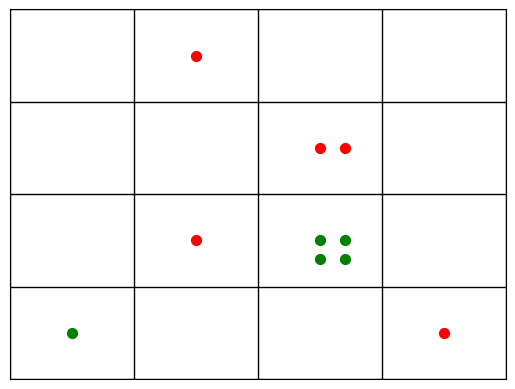

In [7]:
# Example usage:
matrix_state = [
    ['--', '01', '--', '10'],
    ['--', '--', '02', '10'],
    ['--', '01', '14', '--'],
    ['11', '--', '--', '01']
]

plot_grid(matrix_state)